<a href="https://colab.research.google.com/github/ShaunakSen/DS-ML-Concepts/blob/main/Applied_Stats_and_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

### Similate the Prob Distribution Function of Sum of N pair turns of dice throw

In [20]:
N = 10000
num_throws = 2

outcomes = []

for i in range(N):
    throw_results = [random.randint(1, 6) for _ in range(num_throws)]
    throw_sum = sum(throw_results)
    outcomes.append(throw_sum)

In [21]:
outcomes[:10]

[2, 8, 5, 4, 12, 8, 10, 3, 12, 4]

In [28]:
pmf = pd.Series(outcomes).value_counts(normalize=True).sort_index()

In [40]:
pmf = pd.DataFrame(pmf).reset_index().rename(columns={"index": "outcome"})

In [42]:
pmf['cdf'] = pmf['proportion'].cumsum()

In [44]:
pmf

,outcome,proportion,cdf
0,2,0.0267,0.0267
1,3,0.0578,0.0845
2,4,0.0787,0.1632
3,5,0.1141,0.2773
4,6,0.1374,0.4147
5,7,0.1616,0.5763
6,8,0.1431,0.7194
7,9,0.1108,0.8302
8,10,0.0848,0.9150
9,11,0.0569,0.9719


In [45]:
np.sum(pmf['proportion'])

np.float64(0.9999999999999999)

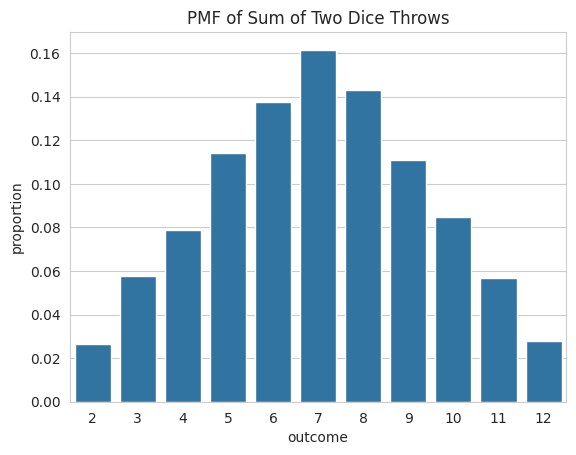

In [51]:
# plot a bar plot using seaborn: x axis outcomes y axis: probablility
sns.barplot(x=pmf['outcome'], y=pmf['proportion']);
# set a title
plt.title("PMF of Sum of Two Dice Throws");

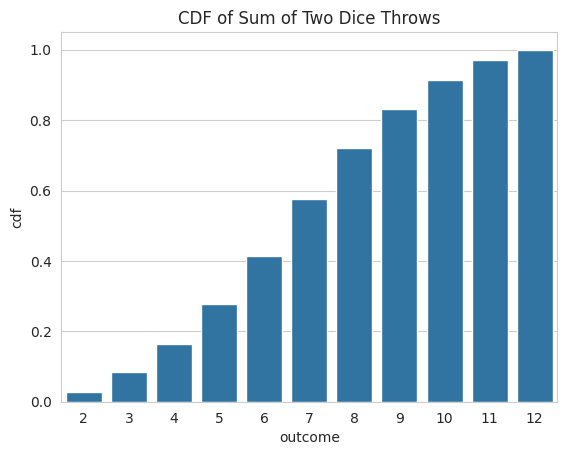

In [52]:
sns.barplot(x=pmf['outcome'], y=pmf['cdf']);
# set a title
plt.title("CDF of Sum of Two Dice Throws");